<a href="https://colab.research.google.com/github/msskx/deepLearning/blob/main/%E5%A4%9A%E5%B1%82%E6%84%9F%E7%9F%A5%E6%9C%BAMinist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import torchvision
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
from torchvision import transforms as T

In [3]:
transformation=T.Compose([
    T.ToTensor(),
])

In [6]:
train_ds=datasets.MNIST(
    './data/',
    train=True,
    transform=transformation,
    download=True
)

In [7]:
test_ds=datasets.MNIST(
    './data/',
    train=False,
    transform=transformation,
    download=True
)

In [9]:
train_dl=DataLoader(train_ds,batch_size=64,shuffle=True)
test_dl=DataLoader(test_ds,batch_size=256)

In [10]:
imgs,labels=next(iter(train_dl))

In [11]:
def imshow(img):
  npimg=img.numpy()
  npimg=np.squeeze(npimg)
  plt.imshow(npimg)

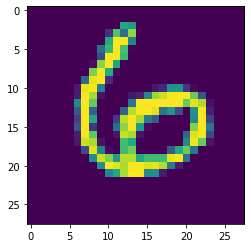

In [13]:
imshow(imgs[0])

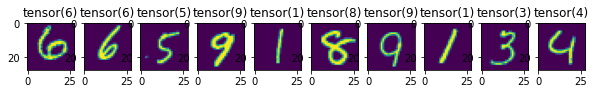

In [17]:
plt.figure(figsize=(10,1))
for i,img in enumerate(imgs[:10]):
  plt.subplot(1,10,i+1)
  imshow(img)
  plt.title(labels[i])

In [27]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.liner_1=nn.Linear(28*28,120)
    self.liner_2=nn.Linear(120,84)
    self.liner_3=nn.Linear(84,10)
  def forward(self,input):
    x=torch.relu(nn.Flatten()(input))
    x=torch.relu(self.liner_1(x))
    x=torch.relu(self.liner_2(x))
    x=torch.sigmoid(self.liner_3(x))
    return x
    

In [28]:
import time

def train(model, optimizer, loss_fn, train_dl, val_dl, epochs=20, device='cuda'):
   
    print('train() called: model=%s, opt=%s(lr=%f), epochs=%d, device=%s\n' % \
          (type(model).__name__, type(optimizer).__name__,
           optimizer.param_groups[0]['lr'], epochs, device))

    history = {} # Collects per-epoch loss and acc like Keras' fit().
    history['loss'] = []
    history['val_loss'] = []
    history['acc'] = []
    history['val_acc'] = []

    start_time_sec = time.time()

    for epoch in range(epochs):

        # --- TRAIN AND EVALUATE ON TRAINING SET -----------------------------
        model.train()
        train_loss         = 0.0
        num_train_correct  = 0
        num_train_examples = 0

        for batch in train_dl:

            optimizer.zero_grad()

            x    = batch[0].to(device)
            y    = batch[1].to(device)
            yhat = model(x)
            loss = loss_fn(yhat, y)

            loss.backward()
            optimizer.step()

            train_loss         += loss.data.item() * x.size(0)
            num_train_correct  += (torch.max(yhat, 1)[1] == y).sum().item()
            num_train_examples += x.shape[0]

        train_acc   = num_train_correct / num_train_examples
        train_loss  = train_loss / len(train_dl.dataset)


        # --- EVALUATE ON VALIDATION SET -------------------------------------
        model.eval()
        val_loss       = 0.0
        num_val_correct  = 0
        num_val_examples = 0

        for batch in val_dl:

            x    = batch[0].to(device)
            y    = batch[1].to(device)
            yhat = model(x)
            loss = loss_fn(yhat, y)

            val_loss         += loss.data.item() * x.size(0)
            num_val_correct  += (torch.max(yhat, 1)[1] == y).sum().item()
            num_val_examples += y.shape[0]

        val_acc  = num_val_correct / num_val_examples
        val_loss = val_loss / len(val_dl.dataset)


        print('Epoch %3d/%3d, train loss: %5.2f, train acc: %5.2f, val loss: %5.2f, val acc: %5.2f' % \
              (epoch+1, epochs, train_loss, train_acc, val_loss, val_acc))

        history['loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['acc'].append(train_acc)
        history['val_acc'].append(val_acc)

    # END OF TRAINING LOOP
    end_time_sec       = time.time()
    total_time_sec     = end_time_sec - start_time_sec
    time_per_epoch_sec = total_time_sec / epochs
    print()
    # print('Time total:     %5.2f sec' % (total_time_sec))
    # print('Time per epoch: %5.2f sec' % (time_per_epoch_sec))

    plt.figure(dpi=400)
    plt.plot(range(1,epochs+1),history['loss'],label='train_loss')
    plt.plot(range(1,epochs+1),history['val_loss'],label='test_loss')
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(dpi=400)
    plt.plot(range(1,epochs+1),history['acc'],label='train_acc')
    plt.plot(range(1,epochs+1),history['val_acc'],label='test_acc')
    plt.title("Accuracy")
    plt.legend()
    plt.show()
    return history
     

In [29]:
model=Model()
opt=optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.CrossEntropyLoss()



train() called: model=Model, opt=Adam(lr=0.001000), epochs=20, device=cpu

Epoch   1/ 20, train loss:  1.59, train acc:  0.87, val loss:  1.52, val acc:  0.94
Epoch   2/ 20, train loss:  1.51, train acc:  0.95, val loss:  1.50, val acc:  0.95
Epoch   3/ 20, train loss:  1.50, train acc:  0.96, val loss:  1.49, val acc:  0.96
Epoch   4/ 20, train loss:  1.49, train acc:  0.97, val loss:  1.49, val acc:  0.97
Epoch   5/ 20, train loss:  1.49, train acc:  0.97, val loss:  1.49, val acc:  0.97
Epoch   6/ 20, train loss:  1.48, train acc:  0.98, val loss:  1.48, val acc:  0.97
Epoch   7/ 20, train loss:  1.48, train acc:  0.98, val loss:  1.48, val acc:  0.98
Epoch   8/ 20, train loss:  1.48, train acc:  0.98, val loss:  1.48, val acc:  0.98
Epoch   9/ 20, train loss:  1.47, train acc:  0.98, val loss:  1.48, val acc:  0.98
Epoch  10/ 20, train loss:  1.47, train acc:  0.99, val loss:  1.48, val acc:  0.98
Epoch  11/ 20, train loss:  1.47, train acc:  0.99, val loss:  1.48, val acc:  0.98
E

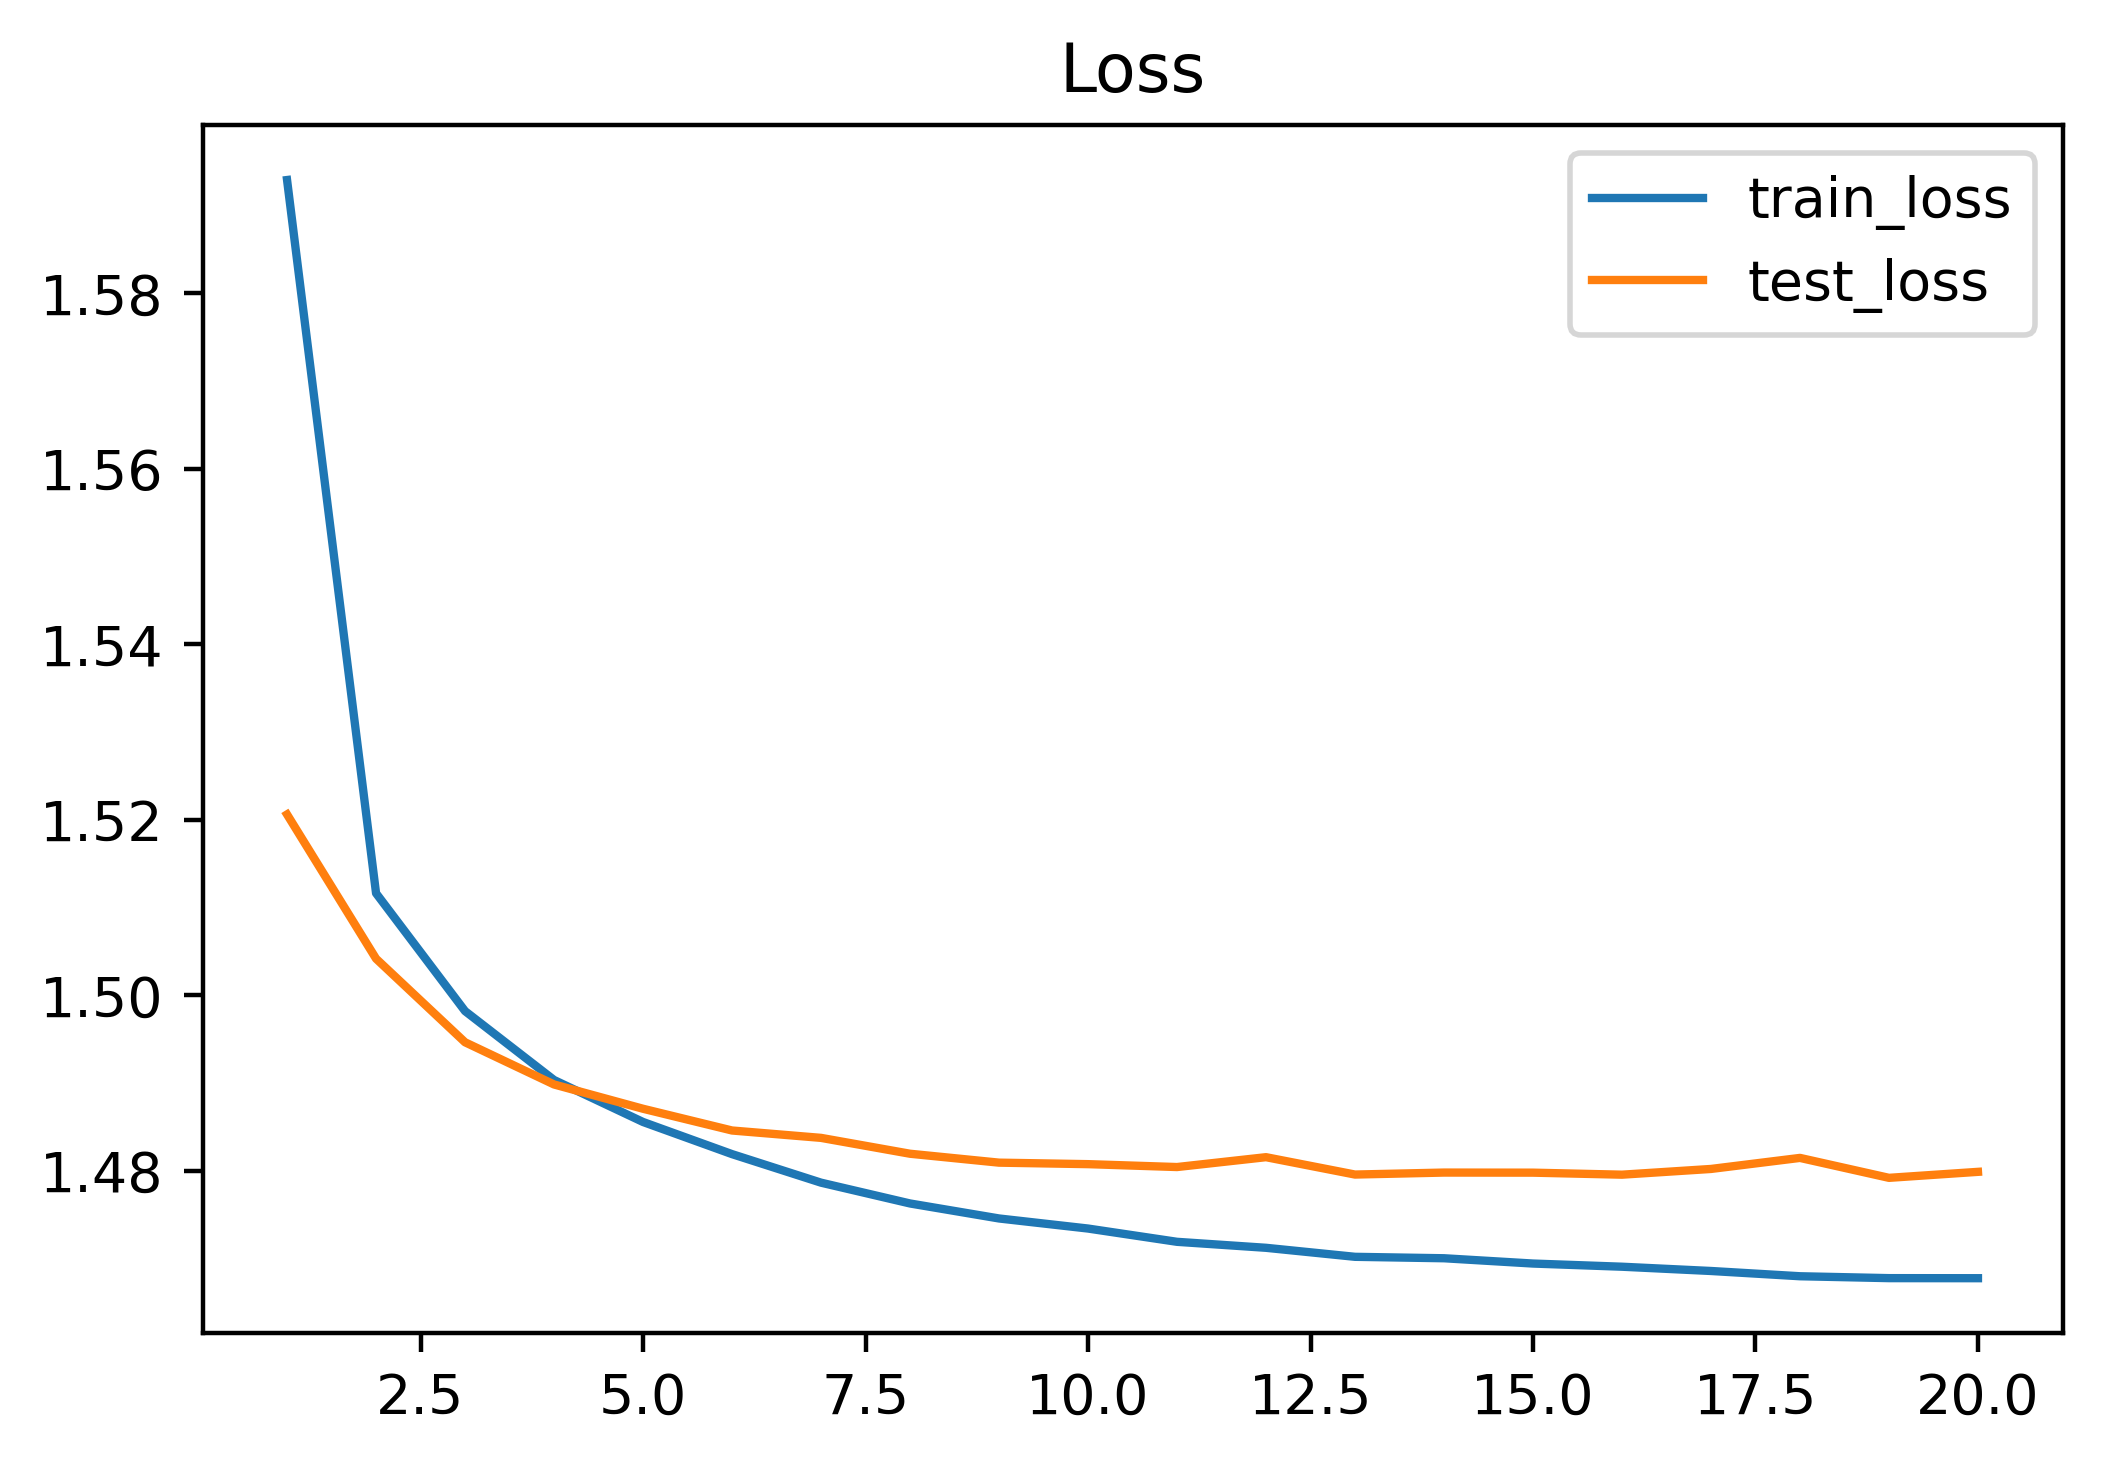

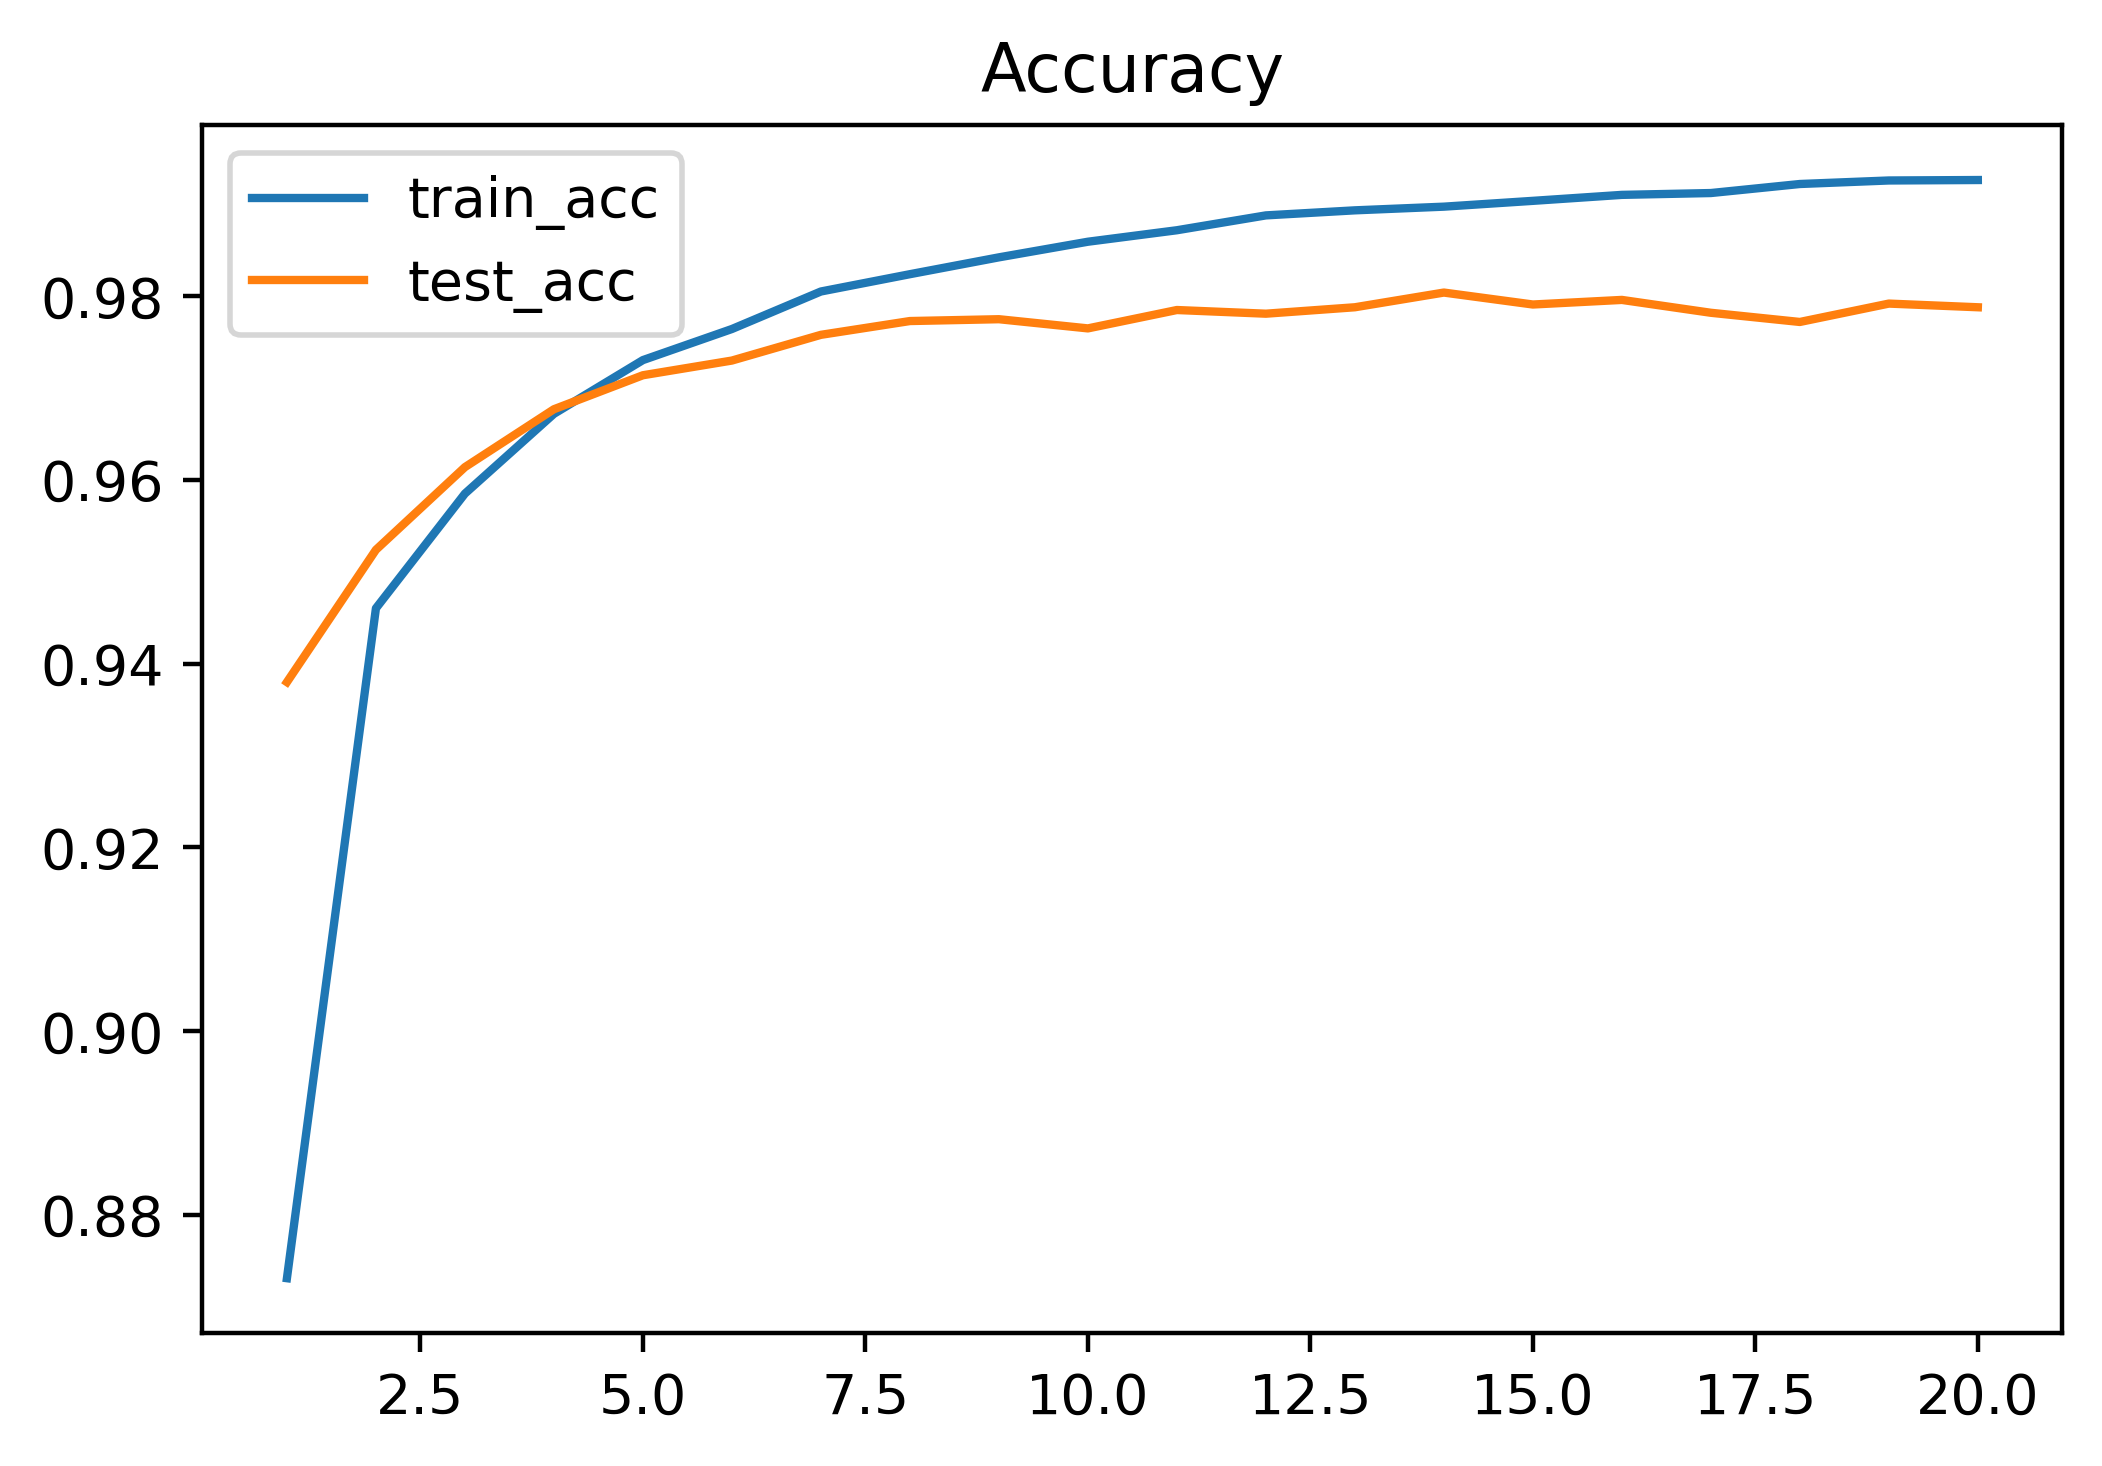

{'loss': [1.5928936321258544,
  1.5116421308517456,
  1.498214974784851,
  1.4903664637883505,
  1.4855814474741618,
  1.4819201857884725,
  1.478668758392334,
  1.4762986695607503,
  1.4745896540323893,
  1.473442496363322,
  1.471930119196574,
  1.4712479965845744,
  1.4702210278193155,
  1.4700575925191244,
  1.469454298400879,
  1.469092733001709,
  1.468606704266866,
  1.4680071406682333,
  1.4677921363830566,
  1.4677845925649007],
 'val_loss': [1.5206180967330933,
  1.5041853607177735,
  1.4946627950668334,
  1.48985537109375,
  1.487088554573059,
  1.4846115982055663,
  1.4837716012954711,
  1.4819640497207642,
  1.4809490558624268,
  1.4807780376434325,
  1.48044817237854,
  1.4815717639923096,
  1.47959310836792,
  1.4798184951782227,
  1.4798085834503174,
  1.4795778228759766,
  1.4802310901641846,
  1.48148982963562,
  1.4792180511474609,
  1.479901833343506],
 'acc': [0.8731166666666667,
  0.9460333333333333,
  0.9585166666666667,
  0.9672,
  0.97305,
  0.9764333333333334,

In [30]:
train(model, opt, loss_fn, train_dl, test_dl, epochs=20, device='cpu')